***Pandas***

El modulo csv es mas adecuado para tareas basicas de lectura y escritura de archivos csv,
y Pandas es mas adecuado para el analisis y manipulacion de conjuntos de datos mas grandes
porque tiene muchas funciones para filtrar, ordenar, transformar y resumir los datos,
que hacen mas facil el trabajo.

En resumen, utilizar pandas en lugar del manejo de archivos tradicional proporciona una mayor facilidad
y eficiencia en la manipulación y análisis de datos, lo que permite realizar tareas complejas de manera
mas sencilla y rapida.

***Analisis de datos***

Resumen: el codigo importa las bibliotecas necesarias para realizar tareas relacionadas con trazado de graficos, manipulacion y analisis de datos, formateo de tablas y generacion de nubes de palabras.

In [36]:
# Importa librerias necesarias

# Importa la libreria matplotlib.pyplot para trazado de graficos
import matplotlib.pyplot as plt
# Importa la libreraa pandas para analisis de datos
import pandas as pd
# Importa la funcion tabulate de la libreria tabulate para formatear tablas
from tabulate import tabulate
# Importa la clase WordCloud de la libreria wordcloud para generar nubes de palabras
from wordcloud import WordCloud

El codigo lee un archivo JSON y carga los datos en un DataFrame de pandas llamado 'df'. Esto facilita la manipulacion y analisis de los datos tabulares.

In [18]:
# Leer el archivo JSON 'perfiles.json' y cargarlo en un dataframe llamado 'df'
df = pd.read_json('perfiles.json')

El codigo lee un archivo JSON y carga los datos en un DataFrame de pandas llamado 'logs_df'. Esto facilita la manipulacion y analisis de los datos tabulares.

In [19]:
# Leer el archivo CSV 'logs.csv' y cargarlo en un dataframe llamado 'logs_df'
logs_df = pd.read_csv('logs.csv')

Realizamos un grafico comparando los dias de la semana en que se realizaron
operaciones usando la aplicacion

Resumen: el codigo procesa los registros de un DataFrame que contiene informacion de operaciones, extrae el dia de la semana de cada registro, cuenta la cantidad de operaciones por dia de la semana y genera un grafico de barras que muestra la distribucion de operaciones por dia de la semana.

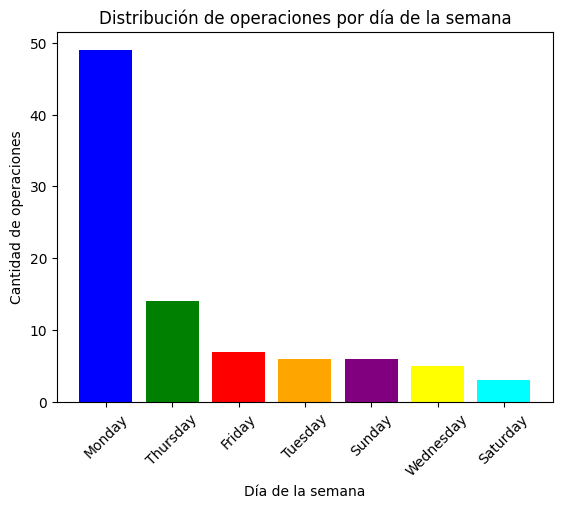

In [21]:
# Convertir la columna 'timestamp' a formato de fecha y hora
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])

# Crear una nueva columna 'DiaSemana' que contenga el nombre del dia de la semana
# correspondiente a cada registro
logs_df['DiaSemana'] = logs_df['timestamp'].dt.day_name()

# Contar la cantidad de registros para cada dia de la semana y ordenar los
# resultados por el indice (orden cronológico)
count = logs_df['DiaSemana'].value_counts()#.reset_index()#.sort_index()
#count.columns = ['DiaSemana','Cantidad']
#count
#len(logs_df)


# Definir una lista de colores para utilizar en la grafica de barras
colores = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan']

# Crear un grafico de barras utilizando los valores y etiquetas del recuento, y
# asignar colores a las barras
plt.bar(count.index, count.values, color=colores)

# Establecer etiquetas para el eje x, el eje y y el título del grafico
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de operaciones')
plt.title('Distribución de operaciones por día de la semana')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el grafico
plt.show()

● Relacionando el archivo de logs con el archivo de perfiles generaramos un grafico que
muestre los porcentajes de uso de la aplicacion por genero

Resumen: el codigo combina dos DataFrames en base a una columna común ('nick'), realiza un conteo de la cantidad de valores unicos en una columna especifica ('genero') y crea un grafico de pastel que muestra el porcentaje de uso por genero en los datos combinados.

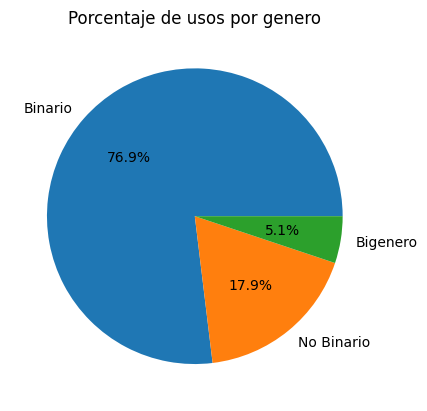

In [26]:
# Hacemos una copia de 'df' para conservar los datos originales
datos_combinados = df.copy()

# Combinar los dataframes 'logs_df' y 'perfiles' en base a la columna 'nick'
datos_combinados = pd.merge(logs_df, pd.DataFrame(df), on='nick')

# Contar la cantidad de valores unicos en la columna 'genero'
count = datos_combinados['genero'].value_counts()
#count

# Crear un grafico de tipo pastel con los resultados
plt.pie(count, labels=count.index, autopct='%1.1f%%')

# Establecer el titulo del grafico
plt.title('Porcentaje de usos por genero')

# Mostrar el grafico
plt.show()

● Generar un grafico que refleje las cantidades de cada operacion realizada.

Resumen: el codigo cuenta la cantidad de ocurrencias de cada valor en una columna, crea un grafico de barras que muestra las cantidades de cada operacion realizada, y personaliza las etiquetas, el titulo, la rotacion y el espaciado del grafico para mejorar su apariencia y legibilidad.

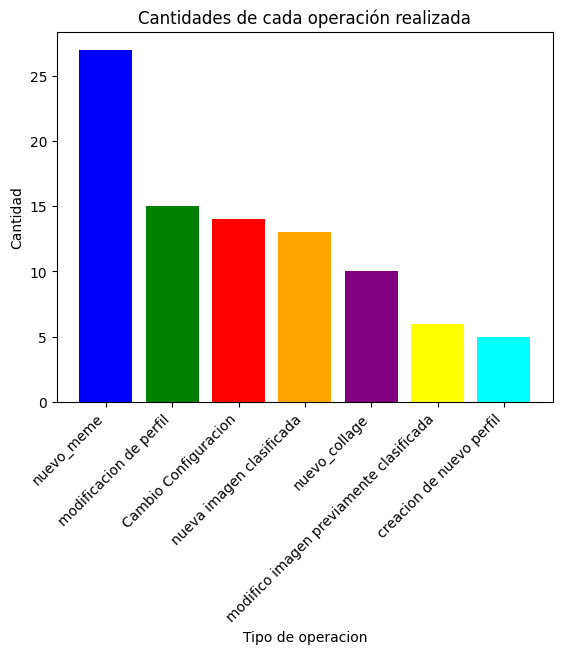

In [27]:
# Contar la cantidad de ocurrencias de cada valor en la columna 'operacion' de 'logs_df'
count = logs_df['operacion'].value_counts()#.reset_index()
#count.columns = ['operacion','cantidad']
#count

# Definir los colores para cada barra del grafico
colores = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan']

# Crear un grafico de barras con los resultados
plt.bar(count.index, count.values, color=colores)

# Establecer etiquetas para el eje x, el eje y
plt.xlabel('Tipo de operacion')
plt.ylabel('Cantidad')

# Establecer el titulo del grafico
plt.title('Cantidades de cada operación realizada')

# Rotar las etiquetas y alinearlas a la derecha
plt.xticks(rotation=45, ha='right')

# Ajustar el espaciado para evitar superposiciones
#plt.tight_layout()

# Mostrar el grafico
plt.show()

● Generar un grafico de barra apilado que muestre las cantidades de operaciones por
nick.

Resumen: el codigo realiza un conteo de las operaciones realizadas por cada 'nick' y muestra los resultados en un grafico de barras horizontales apiladas. Ademas, personaliza las etiquetas, el titulo, la leyenda y el espaciado del grafico para mejorar su apariencia y legibilidad.

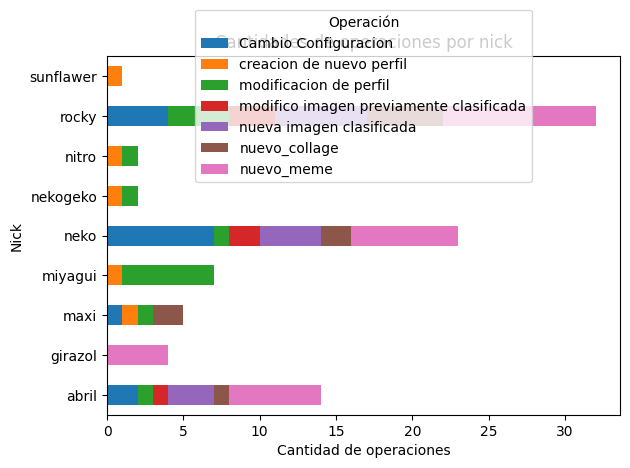

In [28]:
# Conteo de cantidad de operaciones por nick
count = logs_df.groupby('nick')['operacion'].value_counts().unstack()
#count

# Crear un grafico de barras horizontales con los datos de conteo
ax = count.plot.barh(stacked=True)

# Establecer etiquetas para el eje x, el eje y
plt.xlabel('Cantidad de operaciones')
plt.ylabel('Nick')

# Establecer el titulo del grafico
plt.title('Cantidades de operaciones por nick')

# Mover la leyenda fuera del grafico
#plt.legend(title='Operacion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mover la leyenda arriba del grafico
plt.legend(title='Operación', bbox_to_anchor=(0.5, 1.15), loc='upper center')

# Ajustar el espaciado para evitar superposiciones
plt.tight_layout()

# Mostrar el grafico
plt.show()

● Generamos una nube de palabras de los textos agregados en los collages

Resumen: el codigo genera una nube de palabras a partir de los textos agregados en los collages registrados en el DataFrame 'logs_df' con la operacion 'nuevo_collage'. La nube de palabras muestra visualmente las palabras mas frecuentes en los textos de los collages, donde el tamaño de cada palabra es proporcional a su frecuencia de aparicion.

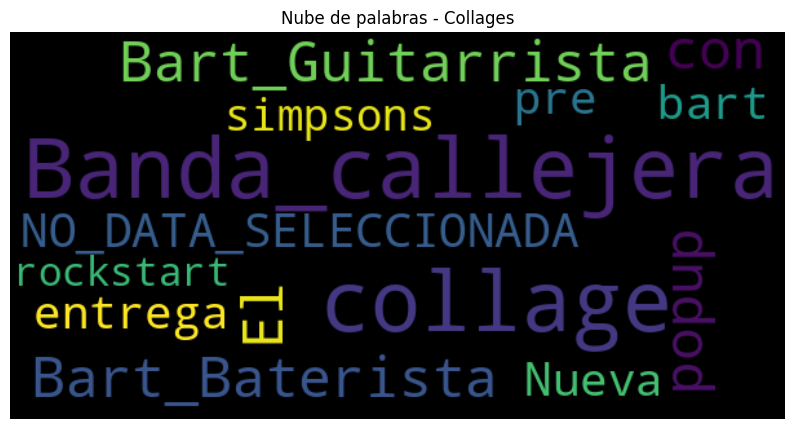

In [31]:
# Obtener los textos agregados en los collages
textos_collages = logs_df[logs_df['operacion'] == 'nuevo_collage']['textos'].dropna().tolist()
#textos_collages

# Verificar si textos_collages está vacío
if not textos_collages:
    textos_collages = ['sin_texto']  # Asignar una lista con una cadena por defecto

# Crear la nube de palabras para los collages
wordcloud_collages = WordCloud(width=600, height=300, background_color='black').generate(' '.join(textos_collages))

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))
# Mostrar la imagen en un grafico
plt.imshow(wordcloud_collages, interpolation='bilinear')

# Establecer el titulo del grafico
plt.title('Nube de palabras - Collages')

# Desactivar los ejes en el grafico
plt.axis('off')

# Mostrar el grafico
plt.show()

● Generamos una nube de palabras de los textos agregados en los memes

Resumen: el codigo genera una nube de palabras a partir de los textos agregados en los memes registrados en el DataFrame 'logs_df' con la operación 'nuevo_meme'. La nube de palabras muestra visualmente las palabras mas frecuentes en los textos de los memes, donde el tamaño de cada palabra es proporcional a su frecuencia de aparicion.

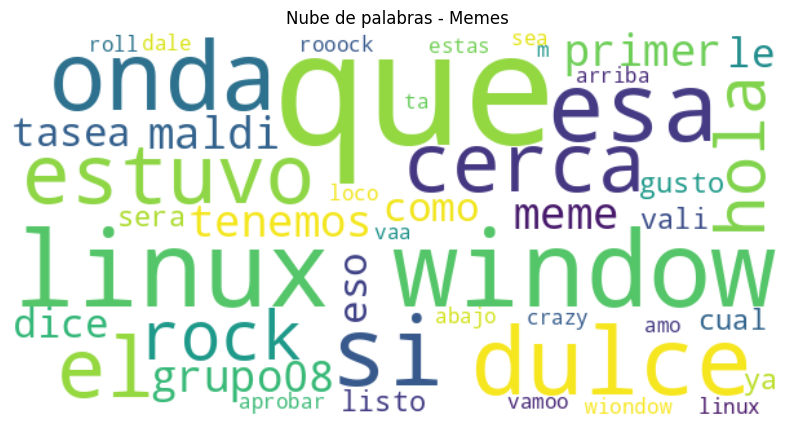

In [32]:
# Obtener los textos agregados en los memes
textos_memes = logs_df[logs_df['operacion'] == 'nuevo_meme']['textos'].dropna().tolist()

# Verificar si textos_collages está vacío
if not textos_memes:
    textos_memes = ['sin_texto']  # Asignar una lista con una cadena por defecto

# Crear la nube de palabras para los memes
wordcloud_memes = WordCloud(width=600, height=300, background_color='white').generate(' '.join(textos_memes))

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))
# Mostrar la imagen en un grafico
plt.imshow(wordcloud_memes, interpolation='bilinear')

# Establecer el titulo del grafico
plt.title('Nube de palabras - Memes')

# Desactivar los ejes en el grafico
plt.axis('off')

# Mostrar el grafico
plt.show()


● Generar un ranking de las 5 imagenes mas usadas para generar memes

Resumen: el codigo filtra los registros del DataFrame 'logs_df' para obtener solamente las operaciones de 'nuevo_meme'. Luego, calcula y muestra el ranking de las 5 imagenes mas utilizadas en dichas operaciones, mostrando el numero de usos de cada imagen en forma de tabla.

In [33]:
# Filtrar el DataFrame para las operaciones de 'nuevo_meme'
df_nuevo_meme = logs_df[logs_df['operacion'] == 'nuevo_meme']

# Obtener el ranking de las 5 imágenes más utilizadas para memes
top_imagenes_memes = df_nuevo_meme['valores'].value_counts().head(5).reset_index()

# Renombrar las columnas del DataFrame
top_imagenes_memes.columns = ['valores', 'Usos para memes']

# Mostrar el ranking de imagenes para memes en forma de tabla
print("Imagenes mas utilizadas para memes:")
top_imagenes_memes

Imagenes mas utilizadas para memes:


,valores,Usos para memes
0,meme8.png,11
1,meme2.png,8
2,meme3.png,3
3,simpsons-rock.png,2
4,meme1.png,2


● Generar un ranking de las 5 imagenes mas usadas para generar collages

Resumen: el codigo filtra los registros del DataFrame 'logs_df' para obtener solamente las operaciones de 'nuevo_collage'. Luego, calcula y muestra el ranking de las 5 imagenes mas utilizadas en dichas operaciones, mostrando el numero de usos de cada imagen en forma de tabla.

In [34]:
# Filtrar el DataFrame para las operaciones de 'nuevo_meme'
df_nuevo_collage = logs_df[logs_df['operacion'] == 'nuevo_collage']

# Obtener el ranking de las 5 imágenes más utilizadas para collages
top_imagenes_collages = df_nuevo_collage['valores'].value_counts().head(5).reset_index()
top_imagenes_collages.columns = ['valores', 'Usos para collages']

# Mostrar el ranking de imágenes para collages en forma de tabla
print("Imagenes mas utilizadas para collages:")
top_imagenes_collages

Imagenes mas utilizadas para collages:


,valores,Usos para collages
0,banda_calle.png,3
1,6cd7e8c2d45a0b5e.png;simpson_terror.png;bart.p...,2
2,simpsons-rock.png,1
3,bart.png,1
4,banda_calle.png;bart.png;homero_acdc.png;,1


Con los datos del archivo de perfiles generamos un grafico de torta con los porcentajes
segun genero de las personas que realizaron las operaciones:
* Nueva imagen clasificada.
* Modificación de imagen previamente clasificada

Resumen: el codigo combina los datos de dos DataFrames (log_df y df), filtra las operaciones relevantes y muestra un grafico de torta que representa el porcentaje de operaciones relevantes por genero.

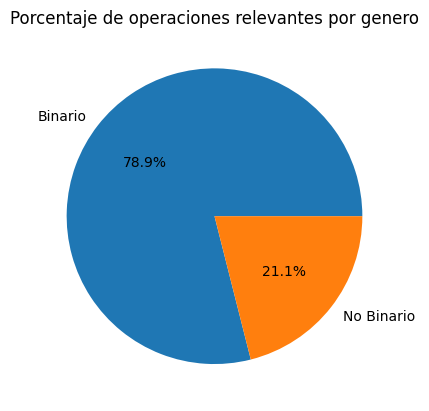

In [35]:
# Combinar los datos utilizando el identificador de usuario
datos_combinados = pd.merge(logs_df, df, on='nick')


# Filtrar las operaciones relevantes
operaciones_relevantes = datos_combinados[
    (datos_combinados['operacion'] == 'nueva imagen clasificada') |
    (datos_combinados['operacion'] == 'modifico imagen previamente clasificada')
]

# Calcular los porcentajes de operaciones por genero
porcentajes = operaciones_relevantes['genero'].value_counts(normalize=True) * 100
#porcentajes.round(2)

# Crear el grafico de torta
plt.pie(porcentajes.values, labels=porcentajes.index, autopct='%1.1f%%')

# Establecer el titulo del grafico
plt.title('Porcentaje de operaciones relevantes por genero')

# Mostrar el grafico
plt.show()